Mean values of each metric by hemorrhage type:
        Mean_HU  Volume_[mL]
Type                        
EDH   55.972682    11.514054
IPH   47.541462    10.248063
SDH   50.312719     6.581266
 
Standard deviation of each metric by hemorrhage type:
        Mean_HU  Volume_[mL]
Type                        
EDH    9.537515    24.975836
IPH    8.581591    22.848984
SDH   12.469281    19.018982
 


(0.0, 90.0)

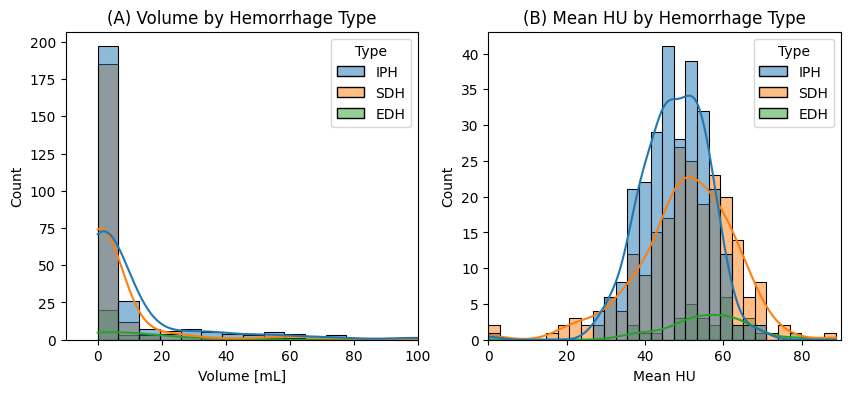

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig_df = pd.read_csv('../datasets/BHSD/BHSD_hemorrhage_characteristics.csv')

# Exclude SAH and IVH subtypes - out of scope for this work
mask = fig_df['Type'] == 'SAH'
fig_df = fig_df[~mask]
mask = fig_df['Type'] == 'IVH'
fig_df = fig_df[~mask]

print('Mean values of each metric by hemorrhage type:')
print(fig_df.groupby(['Type'])[['Mean_HU', 'Volume_[mL]']].mean())
print(' ')
print('Standard deviation of each metric by hemorrhage type:')
print(fig_df.groupby(['Type'])[['Mean_HU', 'Volume_[mL]']].std())
print(' ')

# Plot
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(ax=axes[0], data=fig_df, x='Volume_[mL]', hue='Type', bins=30, kde=True)
axes[0].set_title('(A) Volume by Hemorrhage Type')
axes[0].set_xlabel('Volume [mL]')
axes[0].set_xlim([-10, 100]) # there is a very small number of hemorrhages with volumes between 100-200 mL, excluding from visualization
sns.histplot(ax=axes[1], data=fig_df, x='Mean_HU', hue='Type', bins=30, kde=True, legend=True)
axes[1].set_title('(B) Mean HU by Hemorrhage Type')
axes[1].set_xlabel('Mean HU')
axes[1].set_xlim([0, 90])

(0.0, 90.0)

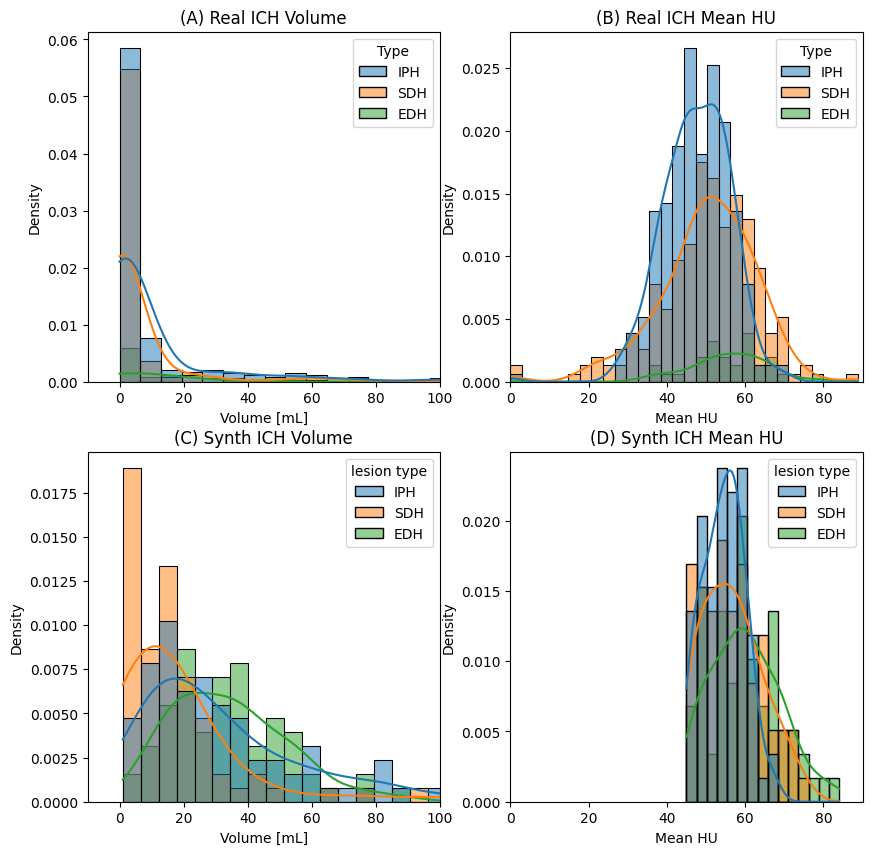

In [16]:
df_1 = pd.read_csv('../datasets/mA_280_run1/mA_280_run1_metadata.csv')
df_2 = pd.read_csv('../datasets/mA_280_run2/mA_280_run2_metadata.csv')
df_3 = pd.read_csv('../datasets/mA_280_run3/mA_280_run3_metadata.csv')

df_1 = (df_1.groupby(['name', 'intensity', 'lesion type'])['lesion volume [mL]'].sum()).reset_index()
df_1['intensity'] = df_1['intensity'].apply(lambda x: float(x.split('[')[-1].split(']')[0])).astype(int)
df_1['lesion type'] = df_1['lesion type'].apply(lambda x: str(x.split('[')[-1].split(']')[0]))
df_1['dataset'] = 'DS1'

df_2 = (df_2.groupby(['name', 'intensity', 'lesion type'])['lesion volume [mL]'].sum()).reset_index()
df_2['intensity'] = df_2['intensity'].apply(lambda x: float(x.split('[')[-1].split(']')[0])).astype(int)
df_2['lesion type'] = df_2['lesion type'].apply(lambda x: str(x.split('[')[-1].split(']')[0]))
df_2['dataset'] = 'DS3'

df_3 = (df_3.groupby(['name', 'intensity', 'lesion type'])['lesion volume [mL]'].sum()).reset_index()
df_3['intensity'] = df_3['intensity'].apply(lambda x: float(x.split('[')[-1].split(']')[0])).astype(int)
df_3['lesion type'] = df_3['lesion type'].apply(lambda x: str(x.split('[')[-1].split(']')[0]))
df_3['dataset'] = 'DS3'

ds_all = pd.concat((df_1, df_2, df_3)).reset_index()

ds_all['lesion type'] = ds_all['lesion type'].replace("'round'", 'IPH')
ds_all['lesion type'] = ds_all['lesion type'].replace("'epidural'", 'EDH')
ds_all['lesion type'] = ds_all['lesion type'].replace("'subdural'", 'SDH')

# Plot
fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes = axes.flatten()

sns.histplot(ax=axes[0], data=fig_df, x='Volume_[mL]', hue='Type', bins=30, kde=True, stat='density')
axes[0].set_title('(A) Real ICH Volume')
axes[0].set_xlabel('Volume [mL]')
axes[0].set_xlim([-10, 100]) # there is a very small number of hemorrhages with volumes between 100-200 mL, excluding from visualization
sns.histplot(ax=axes[1], data=fig_df, x='Mean_HU', hue='Type', bins=30, kde=True, legend=True, stat='density')
axes[1].set_title('(B) Real ICH Mean HU')
axes[1].set_xlabel('Mean HU')
axes[1].set_xlim([0, 90])

sns.histplot(ax=axes[2], data=ds_all, x='lesion volume [mL]', hue='lesion type', bins=30, kde=True, hue_order=['IPH', 'SDH', 'EDH'], stat='density')
axes[2].set_title('(C) Synth ICH Volume')
axes[2].set_xlabel('Volume [mL]')
axes[2].set_xlim([-10, 100]) # there is a very small number of hemorrhages with volumes between 100-200 mL, excluding from visualization
sns.histplot(ax=axes[3], data=ds_all, x='intensity', hue='lesion type', bins=15, kde=True, legend=True, hue_order=['IPH', 'SDH', 'EDH'], stat='density')
axes[3].set_title('(D) Synth ICH Mean HU')
axes[3].set_xlabel('Mean HU')
axes[3].set_xlim([0, 90])



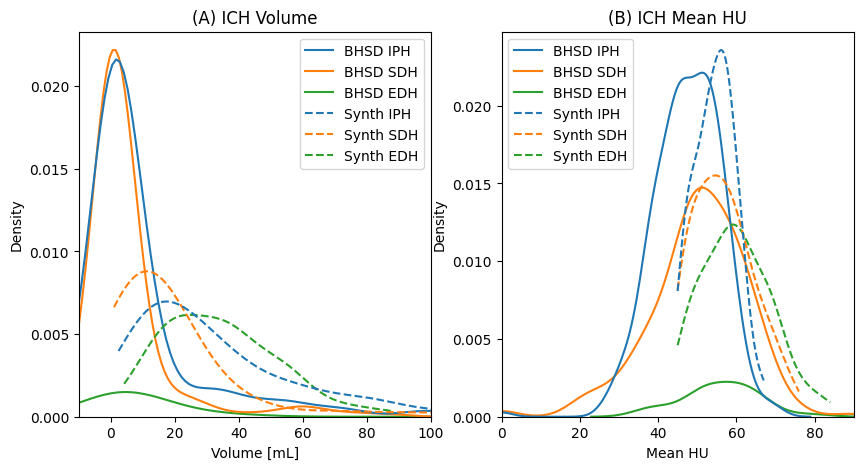

In [28]:
# try for just KDE
import matplotlib

# super ugly but going to whip up a custom legend because the two dataframes can't be easily merged
blue_solid = matplotlib.lines.Line2D([], [], color='tab:blue', marker=None, linestyle='-', label='BHSD IPH')
orange_solid = matplotlib.lines.Line2D([], [], color='tab:orange', marker=None, linestyle='-', label='BHSD SDH')
green_solid = matplotlib.lines.Line2D([], [], color='tab:green', marker=None, linestyle='-', label='BHSD EDH')
blue_dash = matplotlib.lines.Line2D([], [], color='tab:blue', marker=None, linestyle='--', label='Synth IPH')
orange_dash = matplotlib.lines.Line2D([], [], color='tab:orange', marker=None, linestyle='--', label='Synth SDH')
green_dash = matplotlib.lines.Line2D([], [], color='tab:green', marker=None, linestyle='--', label='Synth EDH')

handles = [blue_solid, orange_solid, green_solid, blue_dash, orange_dash, green_dash]
labels = [h.get_label() for h in handles]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes = axes.flatten()

sns.kdeplot(ax=axes[0], data=fig_df, x='Volume_[mL]', hue='Type', legend=False)
sns.kdeplot(ax=axes[0], data=ds_all, x='lesion volume [mL]', hue='lesion type', hue_order=['IPH', 'SDH', 'EDH'], linestyle='--', legend=False, cut=0)
axes[0].set_title('(A) ICH Volume')
axes[0].set_xlabel('Volume [mL]')
axes[0].set_xlim([-10, 100]) # there is a very small number of hemorrhages with volumes between 100-200 mL, excluding from visualization
axes[0].legend(handles=handles, labels=labels)

sns.kdeplot(ax=axes[1], data=fig_df, x='Mean_HU', hue='Type', legend=False)
sns.kdeplot(ax=axes[1], data=ds_all, x='intensity', hue='lesion type', hue_order=['IPH', 'SDH', 'EDH'], linestyle='--',  legend=False, cut=0)
axes[1].set_title('(B) ICH Mean HU')
axes[1].set_xlabel('Mean HU')
axes[1].set_xlim([0, 90])
axes[1].legend(handles=handles, labels=labels)



# WIP: Trying to evaluate input vs output volume ...

In [ ]:
df_1 = pd.read_csv('../datasets/mA_280_run1/mA_280_run1_metadata.csv')
df_2 = pd.read_csv('../datasets/mA_280_run2/mA_280_run2_metadata.csv')
df_3 = pd.read_csv('../datasets/mA_280_run3/mA_280_run3_metadata.csv')

input_1 = pd.read_csv('/projects01/didsr-aiml/jayse.weaver/pedsilicoICH/mA_280_run1/mA_280_run1.csv')

df_grouped = df_1.groupby(['name'])['lesion volume [mL]'].sum()
df_grouped = df_grouped.reset_index()
df_grouped['input volume'] = input_1['volume']
df_grouped['lesion type'] = input_1['subtype']

print(df_grouped)
df_grouped = df_grouped.sort_values(by=['lesion type'])
print(df_grouped.to_string())

import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.plot(df_grouped['name'], df_grouped['lesion volume [mL]'], label='mask volume')
plt.plot(df_grouped['name'], df_grouped['input volume'], label='input volume')
plt.legend()
plt.xticks(rotation=90)
plt.show()


